In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Logistic Regression and Neural networks

Today's task is to do even/odd binary classification on the MNIST dataset. Each data sample is an image of an handwritten digit from 0 to 9, and is labelled with the digit it represents. We will first perform logistic regression, and then train a neural network to perform this task.
1. In Exercise 1, we will load and preprocess our dataset and its labels.
2. In Exercise 2, we will perform classification by doing logistic regression.
3. In Exercise 3, we will train a neural network to classify the dataset. We will then compare the performance of logistic regression and neural networks.

## Ex 1. Dataset loading and preprocessing
We first preprocess the mnist dataset in order to use apply logistic regression first and neural networks later.
Our task is to do even/odd binary classification on the MNIST dataset. 
The dataset is composed of 10000 images, each of which is 28x28 pixels. 

In [2]:
#load the mnist dataset
mnist= np.load("mnist.npy")
mnist_labels = np.load("mnist_labels.npy")

X=mnist
y=(mnist_labels%2)*2.0-1 # 1 for odd, -1 for even.

label=1.0


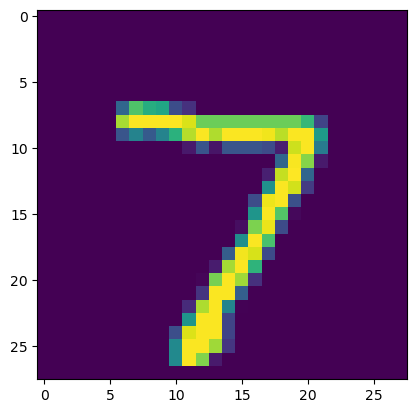

In [3]:
#printing the first digit
idx=0
plt.imshow(X[idx])
print(f"label={y[idx]}")

#### Ex 1.1
1. Reshape X so that it is a 10000 by 768 matrix.
2. Do a 60:20:20  train, validation, test split. The train, validation and test set shall be named `X_train`,`y_train`, `X_val`, `y_val`, `X_test`,  `y_test`

Before splitting, the lines of the data matrix should be randomly permuted to guarantee that samples in each set are independent.

Hint: for the splitting, check for a dedicated function in skelarn

In [4]:
### your code goes here ###

In [5]:
#Solution
X=np.reshape(X,[10000,28*28])
X_train,X_tv,y_train,y_tv=train_test_split(X,y,shuffle=True, train_size=0.6)
X_val,X_test,y_val,y_test=train_test_split(X_tv,y_tv,shuffle=True, train_size=0.5)

#### Ex 1.2 Normalize the dataset. 
1. Compute the mean and standard deviation over the whole *training* dataset (i.e. the mean and std should be two scalars computed on all the elements of `X_train`). 
2. Then normalize the `X_train`,`X_val`,`X_test` using the mean and std computed above

Why using `X_train` to compute the normalization and then applying the same normalization also to `X_val`,  `X_test`?
1. If one computed the normalization on the whole `X`, this would have introduced correlations between the datasets
2. In some cases `X_test,y_test` represent new data which are not available at the moment of training. Then it's important to have a unique way of normalizing, using only the training set

In [6]:
### your code goes here ###

In [7]:
# Solution:
#center and normalize the dataset 
mean=np.mean(X_train)
std=np.std(X_train)

X_train=(X_train-mean)/std
X_val=(X_val-mean)/std
X_test=(X_test-mean)/std

## Ex 2: Logistic regression
In this exercise you will implement a classifier that uses logistic regression to distinguish even from odd digits in the MNIST dataset. The classifier will be trained using gradient descent.
Let's set some notation: we call $n$ the number of datapoints in the training set and $d$ the dimensionality of each datapoint.



In the logistic regression case, recall that our predictor is $z= \vec x \cdot \vec w$, where both $\vec x$ and $\vec w$ live in $\mathbb R^d$.

The regularized training loss is
$$\mathcal L(\vec w)=\frac{1}{n}\sum_{\mu=1}^n\ell(y_\mu,\vec X_\mu\cdot \vec w)+\frac{\lambda}{n}\sum_{i=1}^d w_i^2,\quad \ell(y,z)=\log(1+e^{-yz})$$

The gradient of the loss with respect to $\vec w $ is 
$$\frac{\partial \mathcal L}{\partial \vec w_i}(\vec w)=-\frac{1}{n}\sum_{\mu=1}^n \frac{e^{-y_\mu \vec X_\mu\cdot \vec w}}{1+e^{-y_\mu \vec X_\mu\cdot \vec w}} X_{\mu i} y_\mu+\frac{2\lambda}{n}\vec w_i$$

#### Ex 2.1:  Implementing the gradient
Using the above formula, implement a function `loss_gradient` that takes as arguments `X_train,y_train,w,lambd` and returns a numpy array containing the gradient of the loss.

In [8]:
### your code goes here ###

In [9]:
# Solution:
def loss_gradient(X_train,y_train,w,lambd):
    y_pred_train=X_train@w
    exp_ell=np.exp(-y_train*y_pred_train)
    deriv_ell=-y_train*exp_ell/(1+exp_ell) #derivative of $\ell$ w.r.t. z
    grad_loss=(deriv_ell@X_train+2*lambd*w)/X_train.shape[0]
    return grad_loss

#### Ex 2.2: training
Write a training loop that perfoms gradient descent.
1. Set $\lambda=1$ and choose a good step size that allows the algorithm to learn. 2000 steps should be enough to learn. For the initialization you can use a random one.
2. Every 100 gradient steps, a measurement of training and validation accuracies (i.e. 1- error), should be taken and stored in lists. 
3. After the training make a plot of train and test accuracies vs time

*Recall that the accuracy of a model is the fraction of times the model correctly predicts the class.*

In [10]:
tmax=2000 #number of iterations
lambd=1 #regularization

### your code goes here ###

for t in range(tmax):# training loop
    ### your code goes here ###
    pass 

In [11]:
#Solution:
tmax=2000 #number of iterations
lambd=1 #regularization
gamma=0.1 #step size
w=np.random.random(size=X.shape[1]) #random initialization
train_acc_list=[] #list of recorded training errors 
val_acc_list=[] #list of recorded validation errorsx+
measure_spacing=100 #time spacing between two times where we take measures of training and validation error. This is done to avoid taking measurements at every time step, which is expensive 

for t in range(tmax):# training loop
    if(t%measure_spacing==0):
        y_pred_train= np.sign(X_train@w)
        train_acc=np.mean(y_pred_train==y_train)
        train_acc_list.append(train_acc)
        y_pred_val=np.sign(X_val@w)
        validation_acc=np.mean(y_pred_val==y_val)
        val_acc_list.append(validation_acc)
        print(f"t={t}, train accuracy={train_acc:.2f}, validation acuracy={validation_acc:.2f}")
        
    #gradient step    
    w=w-gamma*loss_gradient(X_train,y_train,w,lambd)

t=0, train accuracy=0.36, validation acuracy=0.36
t=100, train accuracy=0.81, validation acuracy=0.81
t=200, train accuracy=0.86, validation acuracy=0.87
t=300, train accuracy=0.89, validation acuracy=0.88
t=400, train accuracy=0.89, validation acuracy=0.88
t=500, train accuracy=0.89, validation acuracy=0.88
t=600, train accuracy=0.90, validation acuracy=0.88
t=700, train accuracy=0.90, validation acuracy=0.89
t=800, train accuracy=0.90, validation acuracy=0.89
t=900, train accuracy=0.90, validation acuracy=0.89
t=1000, train accuracy=0.91, validation acuracy=0.89
t=1100, train accuracy=0.91, validation acuracy=0.89
t=1200, train accuracy=0.91, validation acuracy=0.89
t=1300, train accuracy=0.91, validation acuracy=0.89
t=1400, train accuracy=0.91, validation acuracy=0.89
t=1500, train accuracy=0.91, validation acuracy=0.89
t=1600, train accuracy=0.91, validation acuracy=0.89
t=1700, train accuracy=0.91, validation acuracy=0.89
t=1800, train accuracy=0.91, validation acuracy=0.89
t=190

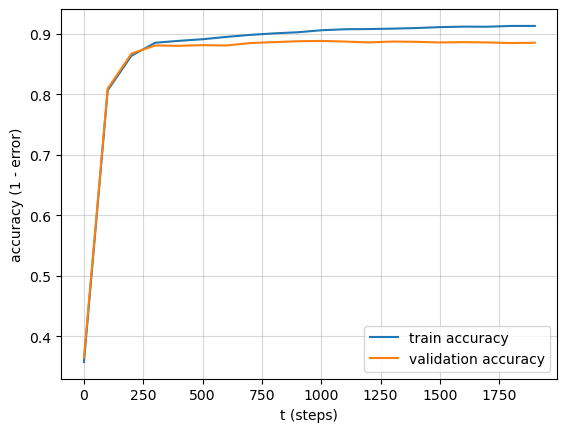

In [12]:
#Solution
plt.plot(measure_spacing*np.arange(0,len(train_acc_list)),train_acc_list,label="train accuracy");
plt.plot(measure_spacing*np.arange(0,len(train_acc_list)),val_acc_list,label="validation accuracy");
plt.grid(alpha=0.5);
plt.xlabel('t (steps)');
plt.ylabel('accuracy (1 - error)');
plt.legend()

#### Ex 2.3: Early stopping
Modify the training loop to implement early stopping (you can copy-paste the training loop you wrote and modify it). 
You will do so by still runnnig gradient descent for a fixed number of steps `tmax`.
Whenever you take a measurement of the validation accuracy, check if this is the highest accuracy reached so far in the training. If it is, save in memory the current weight vector and time. This way at the end of training you will have your weight vector with highest validation accuracy.

After training the model again make a showing the train and validation accuracies vs time. Mark in some way the time at which the highest validation accuracy was achieved. Finally compute the test error of the weight vector with highest validation error


In [13]:
#Solution:
tmax=2000 #number of iterations
lambd=1 #regularization
gamma=0.1 #step size
w=np.random.random(size=X.shape[1]) #random initialization
train_acc_list=[] #list of recorded training errors 
val_acc_list=[] #list of recorded validation errors
measure_spacing=100 #time spacing between two times where we take measures of training and validation error. This is done to avoid taking measurements at every time step, which is expensive 

#keep the best validation error and weight vector encountered so far
best_validation_acc=0 
best_w=w.copy()
best_t=0

for t in range(tmax):# training loop
    if(t%measure_spacing==0):
        y_pred_train= np.sign(X_train@w)
        train_acc=np.mean(y_pred_train==y_train)
        train_acc_list.append(train_acc)
        y_pred_val=np.sign(X_val@w)
        validation_acc=np.mean(y_pred_val==y_val)
        val_acc_list.append(validation_acc)
        
        if(validation_acc>best_validation_acc):
            best_w=w.copy()
            best_validation_acc=validation_acc
            best_t=t
            
        print(f"t={t}, train accuracy={train_acc:.2f}, validation acuracy={validation_acc:.2f}")
        
    #gradient step    
    w=w-gamma*loss_gradient(X_train,y_train,w,lambd)

t=0, train accuracy=0.34, validation acuracy=0.35
t=100, train accuracy=0.80, validation acuracy=0.80
t=200, train accuracy=0.86, validation acuracy=0.86
t=300, train accuracy=0.89, validation acuracy=0.88
t=400, train accuracy=0.89, validation acuracy=0.87
t=500, train accuracy=0.89, validation acuracy=0.87
t=600, train accuracy=0.90, validation acuracy=0.87
t=700, train accuracy=0.90, validation acuracy=0.87
t=800, train accuracy=0.90, validation acuracy=0.87
t=900, train accuracy=0.90, validation acuracy=0.87
t=1000, train accuracy=0.91, validation acuracy=0.87
t=1100, train accuracy=0.91, validation acuracy=0.88
t=1200, train accuracy=0.91, validation acuracy=0.88
t=1300, train accuracy=0.91, validation acuracy=0.88
t=1400, train accuracy=0.91, validation acuracy=0.88
t=1500, train accuracy=0.91, validation acuracy=0.88
t=1600, train accuracy=0.91, validation acuracy=0.88
t=1700, train accuracy=0.91, validation acuracy=0.88
t=1800, train accuracy=0.91, validation acuracy=0.88
t=190

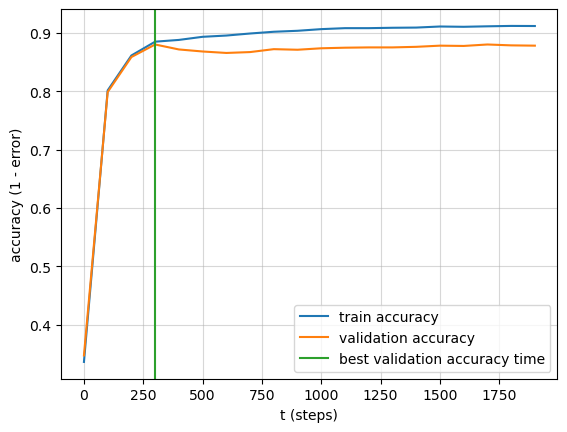

In [14]:
#Solution
plt.plot(measure_spacing*np.arange(0,len(train_acc_list)),train_acc_list,label="train accuracy");
plt.plot(measure_spacing*np.arange(0,len(train_acc_list)),val_acc_list,label="validation accuracy");
plt.axvline(best_t,color="C2",label="best validation accuracy time");
plt.grid(alpha=0.5);
plt.xlabel('t (steps)');
plt.ylabel('accuracy (1 - error)');
plt.legend()

In [15]:
# Solution
#from the graph of the validation error, it seems that the longer we train, the better.
y_pred_test=np.sign(X_test@best_w)
print(f"test accuracy= {np.mean(y_pred_test==y_test)}")

test accuracy= 0.871


###  Ex 2.4: Logistic regression with sklearn
the scikit-learn library contains a logistic regression implementation, allowing to train logistic regression in a couple of lines of code. 
1. Implement logistic regression without regularization
2. Compute the test error


In [16]:
from sklearn.linear_model import LogisticRegression
### your code goes here ###

In [17]:
#Solution
model= LogisticRegression(random_state=0,fit_intercept=False, penalty='none').fit(X_train, y_train)
y_pred_test=model.predict(X_test)
print(f"test accuracy= {np.mean(y_pred_test==y_test)}")

test accuracy= 0.8815


/Users/piccioli/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Ex 3: Neural networks

#### Ex 3.1 To obtain some familiarity with neural networks, go to https://playground.tensorflow.org/.
On the left you can choose a dataset on which to do classification. You can then modify the network by choosing the number of hidden layers, number of neurons in each layer, activation function. 

The hardest dataset to learn is the spiral: play with the parameters of the network until it manages to learn this dataset

### Neural network on MNIST
Next you will implement a one hidden layer network to be trained using GD on MNIST. The neural network function will be the following:
$f(\vec x ;W^1,\vec W^2)=\sum_{a=1}^KW^2_a\sigma\left(\vec W^1_a \cdot \vec x\right)$,
1. $K$ is the dimension (or width) of the hidden layer
2. $W^1\in\mathbb R^{K\times d}$ is the matrix of first layer weights. $W^1_a$ indicates the $a-th$ row of the matrix $W^1$.
3. $\vec W^2\in\mathbb R^K$ is the vector containing the second layer weights. 
4. $\sigma$ is the activation function, or nonlinearity. It acts coordinate-wise on the array it is fed. We set it initially to the hyperbolic tangent function.

### Gradient Computation
We will do gradient descent on the logistic loss 
$$\mathcal L(W^1, \vec W^2)=\frac{1}{n}\sum_{\mu=1}^n\ell(y_\mu,f(\vec x ;W^1,\vec W^2)) ,\quad \ell(y,z)=\log(1+e^{-yz}).$$
In the calculation we will use the notation $z_\mu=f(\vec X_\mu ;W^1,\vec W^2)$


We have 
$$\frac{\partial \mathcal L}{\partial W^2_a}=\frac{1}{n}\sum_{\mu=1}^n\frac{\partial \ell}{\partial z}(y_\mu,z_\mu)\,\,\sigma\left(\vec W^1_a\cdot X_\mu\right)$$
$$\frac{\partial \mathcal L}{\partial W^1_{ai}}=\frac{1}{n}\sum_{\mu=1}^n\frac{\partial \ell}{\partial z}(y_\mu,z_\mu)W^2_a\,\,\sigma'\left(\vec W^1_a\cdot X_\mu\right)X_{\mu i}$$,
where the index $a$ runs from 1 to $K$ and $i$ runs from 1 to $d$.

The following cell contains all the necessary functions, together with their documentation

In [18]:
def sigma(x):
    """
    activation function
    """
    return np.tanh(x) #tanh activation

def deriv_sigma(x):
    """
    derivative of the activation function
    """
    return 1-np.tanh(x)**2 #tanh derivative

def neural_net(X,W_1,W_2): 
    """
    function implementing the neural network. 
    W_1 is a K by d matrix containing the first layer weights.
    W_2 is a vector of length K, containing the second layer weights
    X is a n by d matrix containing the inputs.
    Notice this function will not accept one dimensional arrays as input (X), only two dimensional ones (matrices)
    If X has shape (n,d) then the output will be a numpy array of shape (n,)
    """
    return sigma(X@W_1.T)@W_2

def deriv_ell(y,z):
    """
    derivative of the logistic loss log(1+np.exp(-y*z)) w.r.t. z
    """
    return -y*np.exp(-y*z)/(1+np.exp(-y*z)) 

def grad_W_2(X,W_1,y):
    """
    gradient of the loss with respect to the second layer weights
    returns vecror of length K (same shape as W_2)
    """
    post_activations=sigma(X@W_1.T)
    z=post_activations@W_2
    return deriv_ell(y,z)@post_activations/y.shape[0]

def grad_W_1(X,W_1,W_2,y):
    """
    gradient of the loss with respect to the first layer weights
    returns a K by d matrix (same shape as W_1)
    """
    pre_activations=X@W_1.T
    z=sigma(pre_activations)@W_2
    return np.einsum('m,a,ma,mi->ai',deriv_ell(y,z),W_2,deriv_sigma(pre_activations),X)/y.shape[0]


#### Ex 3.2 Training a neural network
Using the functions above complete the training loop for the neural network below.
1. Set $K=5$ (number of hidden units), initialize the weigths randomly with a small norm, $\gamma=0.3$ seems to work well as step size. Expect around 100-200 iterations to be needed to learn 
2. Keep track of training and validation error along the dynamics, similarly to what you did with logistic regression. You do not need to implement early stopping (but you can do it as an extra)



In [19]:
tmax=200
K=5
gamma=0.3 #learning rate

###your code goes here###

for t in range(tmax):#training loop
    pass
    ### your code goes here###

In [20]:
#Solution:
tmax=200
K=5
gamma=0.3#learning rate
d=X_train.shape[1]
eps=1e-5
W_1=eps*np.random.random(size=[K,d])#initialization
W_2=eps*np.random.random(size=[K])

train_acc_list=[]
val_acc_list=[]

#keep the best validation error and weight vector encountered so far
best_validation_acc=0 
best_W_1=W_1.copy()
best_W_2=W_2.copy()
best_t=0

for t in range(tmax):
    if(t%5==0):
        y_pred_train=np.sign(neural_net(X_train,W_1,W_2))
        train_acc=np.mean(y_pred_train==y_train)
        train_acc_list.append(train_acc)
        y_pred_val=np.sign(neural_net(X_val,W_1,W_2))
        validation_acc=np.mean(y_pred_val==y_val)
        val_acc_list.append(validation_acc)
        print(f"t={t}, train accuracy={train_acc:.2f}, validation acuracy={validation_acc:.2f}")
        
        if(validation_acc>best_validation_acc):
            best_W_1=W_1.copy()
            best_W_2=W_2.copy()
            best_validation_acc=validation_acc
            best_t=t
            
    gradient_W_1=grad_W_1(X_train,W_1,W_2,y_train)
    gradient_W_2=grad_W_2(X_train,W_1,y_train)
    W_1=W_1-gamma*gradient_W_1
    W_2=W_2-gamma*gradient_W_2


t=0, train accuracy=0.35, validation acuracy=0.36
t=5, train accuracy=0.77, validation acuracy=0.76
t=10, train accuracy=0.79, validation acuracy=0.78
t=15, train accuracy=0.81, validation acuracy=0.80
t=20, train accuracy=0.84, validation acuracy=0.84
t=25, train accuracy=0.61, validation acuracy=0.59
t=30, train accuracy=0.85, validation acuracy=0.86
t=35, train accuracy=0.82, validation acuracy=0.80
t=40, train accuracy=0.87, validation acuracy=0.87
t=45, train accuracy=0.87, validation acuracy=0.85
t=50, train accuracy=0.87, validation acuracy=0.87
t=55, train accuracy=0.87, validation acuracy=0.86
t=60, train accuracy=0.87, validation acuracy=0.88
t=65, train accuracy=0.88, validation acuracy=0.86
t=70, train accuracy=0.89, validation acuracy=0.88
t=75, train accuracy=0.89, validation acuracy=0.87
t=80, train accuracy=0.90, validation acuracy=0.89
t=85, train accuracy=0.90, validation acuracy=0.89
t=90, train accuracy=0.91, validation acuracy=0.89
t=95, train accuracy=0.91, valida

#### Ex 3.3 Plotting and testing
1. plot the train and validation accuracy as a function of time
2. compute the test accuracy on the weights with best validation accuracy (if you did the extra point), otherwise on the final weights of the training
3. How does the test accuracy compare with that of logistic regression?

In [21]:
### your code goes here ###

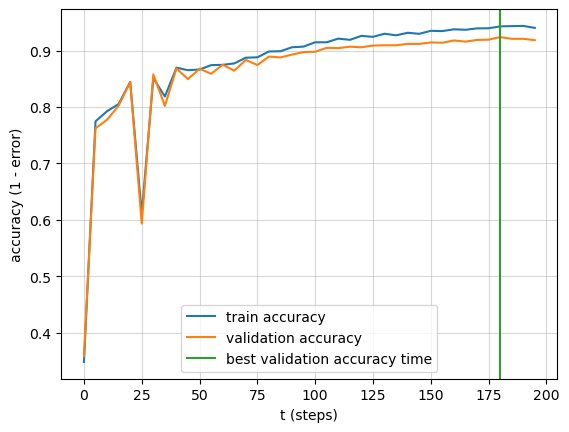

In [22]:
#Solution:
plt.plot(5*np.arange(len(train_acc_list)),train_acc_list,label="train accuracy");
plt.plot(5*np.arange(len(train_acc_list)),val_acc_list,label="validation accuracy");
plt.axvline(best_t,color="C2",label="best validation accuracy time");
plt.grid(alpha=0.5);
plt.xlabel('t (steps)');
plt.ylabel('accuracy (1 - error)');
plt.legend()

In [23]:
# Solution:
y_pred_test=np.sign(neural_net(X_test,best_W_1,best_W_2))
print(f"test accuracy= {np.mean(y_pred_test==y_test)}")
#the model is more accurate on the test dataset compared to logistic regression, this is due to the greater number of available parameters.

test accuracy= 0.922


#### Ex 3.4: **Extra** (do this after doing 3.5) Changing activation function
So far the neural network employed hyperbolic tangent activations.
Change the code above to switch to sigmoid activations. Then retrain the network.
You will have to change the value of learning rate and norm of the initialization, in order for the network to train effectively.

Hint: changing the function `sigma` is not enough...


In [24]:
### your code goes here ###

In [25]:
#Solution (to be copy-pasted in the relevant cells)
def sigma(x):
    """
    activation function
    """
    return 1/(1+np.exp(-x)) #sigmoid activation

def deriv_sigma(x):
    """
    derivative of the activation function
    """
    return sigma(x)*(1-sigma(x)) #sigmoid derivative



#hyperparameters that work well with sigmoid
gamma=8
eps=1e-2
W_1=eps*np.random.random(size=[K,d])#initialization
W_2=eps*np.random.random(size=[K])

#### Ex 3.5 Sklearn implementation of a neural network
1. Use the class MLPClassifier to train a neural network with tanh activation functions
2. Compute the test accuracy of the trained network.

In [26]:
from sklearn.neural_network import MLPClassifier
###your code goes here ###

In [27]:
# Solution:
net= MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5), random_state=1,activation='tanh')
net.fit(X_train,y_train)
y_pred_test=net.predict(X_test)
print(f"test accuracy= {np.mean(y_pred_test==y_test)}")

test accuracy= 0.939
